图片的尺寸 (200, 200, 3)
(3, 200, 200)
(3, 151, 151)
torch.Size([3, 151, 151])


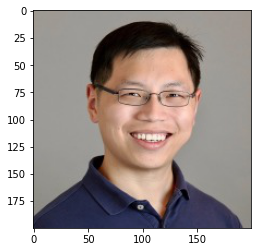

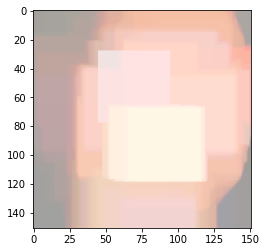

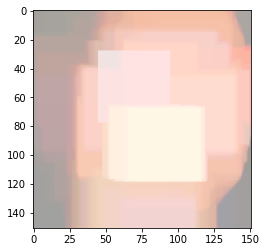

In [22]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import torch.nn as nn
import torch

img = Image.open('./test.jpg')
img = np.array(img)
print("图片的尺寸", img.shape)

plt.imshow(img)
img = np.array(img).transpose(2, 0, 1)

print(img.shape)


def pool2d(X, pool_size, mode='max'):
    """
    实现的类似于 卷积核为(10,10) ，步长为1
    """
    p_h, p_w = pool_size
    Y = np.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_h + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i:i + p_h, j:j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i:i + p_h, j:j + p_w].mean()
    return Y


img_l = []
for temp in img:
    img_l.append(pool2d(temp, (50, 50)))
img_l = np.array(img_l)
print(img_l.shape)
plt.figure()
mean_pool_img = img_l.transpose(1, 2, 0)
# 把图像变成
mean_pool_img = mean_pool_img.clip(0, 255).astype(int)
plt.imshow(mean_pool_img)


# 接来下使用最大
m = nn.MaxPool2d(kernel_size=(50, 50), stride=(1,1))
torch_img = torch.FloatTensor(img)
out = m(torch_img)
print(out.shape)

plt.figure()
mean_pool_img = out.transpose(0,2).transpose(0,1)
# 把图像变成
mean_pool_img = mean_pool_img.numpy().clip(0, 255).astype(int)
plt.imshow(mean_pool_img)




# 下采样

In [ ]:
import torch

input = torch.randn(1, 3, 9)
input.transport

图片的尺寸 (200, 200, 3)
torch.Size([3, 99, 99])
下采样后图片大小 (99, 99, 3)


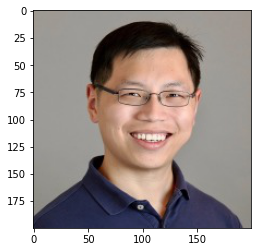

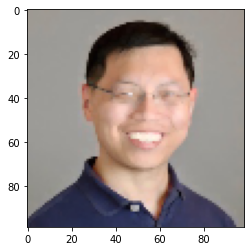

In [4]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import torch.nn as nn
import torch

img = Image.open('./test.jpg')
img = np.array(img)
print("图片的尺寸", img.shape)

plt.imshow(img)
img = np.array(img).transpose(2, 0, 1)

m = nn.MaxPool2d(kernel_size=(3,3), stride=(2,2))
torch_img = torch.FloatTensor(img)
out = m(torch_img)
print(out.shape)

plt.figure()
mean_pool_img = out.transpose(0,2).transpose(0,1)
# 把图像变成
mean_pool_img = mean_pool_img.numpy().clip(0, 255).astype(int)
plt.imshow(mean_pool_img)
print("下采样后图片大小",mean_pool_img.shape)

In [7]:
import torch
import torch.nn as nn

# 仅定义一个 3x3 的池化层窗口
m = nn.MaxPool2d(kernel_size=(3, 3))

# 定义输入
# 四个参数分别表示 (batch_size, C_in, H_in, W_in)
# 分别对应，批处理大小，输入通道数，图像高度（像素），图像宽度（像素）
# 为了简化表示，我们只模拟单张图片输入，单通道图片，图片大小是6x6
input = torch.randn(1, 3, 9, 9)

print(input)

output = m(input)
print(output.shape)
print(output)

tensor([[[[ 1.1511e+00,  7.4202e-01, -1.4852e+00, -5.9796e-01, -1.5153e+00,
           -1.1279e+00, -5.7347e-01, -1.2630e-01,  2.1600e+00],
          [-1.3296e+00, -7.6184e-01,  4.9971e-01, -1.1668e+00, -3.6055e-02,
            9.2021e-01,  4.3776e-01, -1.4341e+00, -8.6815e-01],
          [ 1.2682e+00, -1.1285e+00,  8.1071e-01,  9.4868e-01, -1.1176e+00,
            2.3675e+00,  1.0881e+00, -6.7547e-01, -3.3826e-01],
          [ 5.9222e-01,  4.0076e-01, -9.7629e-02, -1.2417e-01, -1.0339e+00,
            9.8499e-01, -1.2849e+00,  4.5712e-01,  8.2083e-01],
          [ 7.6377e-01,  1.0458e+00,  6.3469e-01,  1.2863e+00,  1.8048e-01,
            5.2412e-01,  4.7454e-01, -1.1886e-01, -3.9006e-02],
          [ 1.1330e+00,  4.8071e-01, -7.9630e-01,  8.9073e-01, -7.2481e-03,
            1.2199e+00, -5.9398e-02,  1.3690e+00,  1.8209e+00],
          [-6.5359e-02, -2.4468e-02, -4.9519e-01,  8.2256e-02,  3.5880e-01,
            7.5972e-01, -9.9625e-01,  2.8805e-01,  1.4985e+00],
          [ 4.0245e-

In [5]:
import torch
import torch.nn as nn

# 仅定义一个 3x3 的池化层窗口
m = nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2))

# 定义输入
# 四个参数分别表示 (batch_size, C_in, H_in, W_in)
# 分别对应，批处理大小，输入通道数，图像高度（像素），图像宽度（像素）
# 为了简化表示，我们只模拟单张图片输入，单通道图片，图片大小是6x6
input = torch.randn(1, 1, 6, 6)

print(input)

output = m(input)

print(output)

tensor([[[[-0.8802, -0.7137, -0.1086,  0.2958, -2.0685, -1.8570],
          [ 0.3142, -0.1778,  1.1254,  0.1809, -2.4710,  0.3579],
          [-0.4305,  0.3063,  1.4509,  0.0465, -1.3887, -0.4082],
          [ 0.1006, -0.5733,  0.3104, -0.2127,  1.6660, -1.8566],
          [ 0.9344, -0.0865, -0.4928, -1.3461, -0.2238,  0.4072],
          [ 0.2398,  0.6714,  0.1131,  0.6177,  1.8863,  1.9633]]]])
tensor([[[[1.4509, 1.4509],
          [1.4509, 1.6660]]]])


In [ ]:
import torch
import torch.nn as nn

# 仅定义一个 3x3 的池化层窗口
m = nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2), ceil_mode=True)

# 定义输入
# 四个参数分别表示 (batch_size, C_in, H_in, W_in)
# 分别对应，批处理大小，输入通道数，图像高度（像素），图像宽度（像素）
# 为了简化表示，我们只模拟单张图片输入，单通道图片，图片大小是6x6
input = torch.randn(1, 1, 6, 6)

print(input)

output = m(input)

print('\n\n\n\n\n')

print(output)
